# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sandi Sukoco Putro
- **Email:** sandisukocoputro.trpl@gmail.com
- **ID Dicoding:** sandi_s_K6D2

## Menentukan Pertanyaan Bisnis

1️⃣ Bagaimana tentang tren jumlah penyewaan sepeda jika didasarkan pada musim?

2️⃣ Bagaimana tentang hubungan antara suhu yang ada dan jumlah sepeda yang disewa?

3️⃣ Bagaimana pola penyewaan sepeda jika didasarkan pada parameter hari kerja dan akhir pekan?

4️⃣ Pada jam berapa terjadinya jumlah penyewaan sepeda paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

Disini digunakan beberapa package untuk melaksanakan proses analisis data

## Data Wrangling

### Gathering Data

In [2]:
# URL direct download Google Drive
day_url = "https://drive.google.com/uc?id=1NnGGLHRch_3H6le-JzwP6ENs5CIO4S-r"
hour_url = "https://drive.google.com/uc?id=1rK53IXZ4qIpVk4i8gRHPeVJRCyNzuuEM"

# Download file
gdown.download(day_url, "day.csv", quiet=False)
gdown.download(hour_url, "hour.csv", quiet=False)

# Load data ke Pandas DataFrame
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

# Tampilkan 5 baris pertama
display(df_day.head(), df_hour.head())

Downloading...
From: https://drive.google.com/uc?id=1NnGGLHRch_3H6le-JzwP6ENs5CIO4S-r
To: /content/day.csv
100%|██████████| 57.6k/57.6k [00:00<00:00, 22.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rK53IXZ4qIpVk4i8gRHPeVJRCyNzuuEM
To: /content/hour.csv
100%|██████████| 1.16M/1.16M [00:00<00:00, 73.9MB/s]


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data dimuat dengan gdown karena bisa langsung memproses link drive.
- Karena pemuatan data berhasil, selanjutnya bisa memasuki tahap Assessing Data.

### Assessing Data

#### Mengecek ukuran dan informasi dataset

In [3]:
# Mengecek ukuran dataset
print(f"\nUkuran dataset harian: {df_day.shape}")
print(f"Ukuran dataset per jam: {df_hour.shape}")

# Menampilkan informasi dataset day & hour
print("\n❄️ Informasi dataset harian:")
df_day.info()
print("\n❄️ Informasi dataset per jam:")
df_hour.info()


Ukuran dataset harian: (731, 16)
Ukuran dataset per jam: (17379, 17)

❄️ Informasi dataset harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91

**Insight:**
- Perbedaan jumlah baris menunjukkan bahwa dataset per jam memiliki lebih banyak data karena mencatat setiap jam sepanjang hari.

#### Mengecek duplikasi data

In [4]:
# Mengecek duplikasi data
print("\n❄️ Jumlah data duplikat di dataset harian:", df_day.duplicated().sum())
print("❄️ Jumlah data duplikat di dataset per jam:", df_hour.duplicated().sum())


❄️ Jumlah data duplikat di dataset harian: 0
❄️ Jumlah data duplikat di dataset per jam: 0


**Insight:**
- Karena tidak ada duplikasi (0), maka dataset sudah bersih dalam hal ini.

#### Melihat statistik deskriptif

In [5]:
# Melihat statistik deskriptif
print("\n❄️ Statistik deskriptif dataset harian:")
display(df_day.describe())

print("\n❄️ Statistik deskriptif dataset per jam:")
display(df_hour.describe())


❄️ Statistik deskriptif dataset harian:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



❄️ Statistik deskriptif dataset per jam:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Memberikan rata-rata, min, max, dan distribusi data untuk tiap variabel numerik.
- Bisa digunakan untuk mendeteksi nilai ekstrem atau outlier.

#### Memeriksa missing value

In [6]:
# Memeriksa jumlah nilai yang hilang
print("\n❄️ Jumlah nilai yang hilang di dataset harian:")
print(df_day.isnull().sum())

print("\n❄️ Jumlah nilai yang hilang di dataset per jam:")
print(df_hour.isnull().sum())


❄️ Jumlah nilai yang hilang di dataset harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

❄️ Jumlah nilai yang hilang di dataset per jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Karena tidak ada missing values (0), dataset sudah siap digunakan tanpa perlu preprocessing tambahan.

#### Pemeriksaan Tambahan

##### Menampilkan nilai unik dari kategori tertentu untuk mendeteksi inconsistent values

In [7]:
# 1. Menampilkan nilai unik dari kategori tertentu untuk mendeteksi inconsistent values
print("Nilai unik kolom musim (season):", df_day['season'].unique())
print("Nilai unik kolom cuaca (weathersit):", df_day['weathersit'].unique())

Nilai unik kolom musim (season): [1 2 3 4]
Nilai unik kolom cuaca (weathersit): [2 1 3]


**Insight:**
- Berguna untuk mengecek apakah ada nilai kategori yang tidak sesuai atau aneh.
- Misalnya, jika season hanya boleh memiliki 4 kategori (1-4), tetapi ada angka di luar itu, berarti ada kesalahan data.

##### Mendeteksi nilai yang tidak valid atau tidak masuk akal

In [8]:
# 2. Mendeteksi nilai yang tidak valid atau tidak masuk akal
print("\nApakah ada suhu negatif?")
print((df_day['temp'] < 0).sum(), "baris dengan suhu negatif")

print("\nApakah ada kecepatan angin negatif?")
print((df_day['windspeed'] < 0).sum(), "baris dengan kecepatan angin negatif")



Apakah ada suhu negatif?
0 baris dengan suhu negatif

Apakah ada kecepatan angin negatif?
0 baris dengan kecepatan angin negatif


**Insight:**
- Karena kecepatan angin tidak mungkin negatif, maka data ini sudah lolos uji nilai tidak valid atau nilai tidak masuk akal.

##### Mendeteksi Outliers dengan metode IQR

In [10]:
# 3. Mendeteksi Outliers dengan metode IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("\nOutliers dalam dataset harian berdasarkan jumlah sepeda yang disewa (cnt):")
display(detect_outliers(df_day, 'cnt'))

print("\nOutliers dalam dataset per jam berdasarkan jumlah sepeda yang disewa (cnt):")
display(detect_outliers(df_hour, 'cnt'))


Outliers dalam dataset harian berdasarkan jumlah sepeda yang disewa (cnt):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt



Outliers dalam dataset per jam berdasarkan jumlah sepeda yang disewa (cnt):


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5536,5537,2011-08-23,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651
10358,10359,2012-03-12,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644
10359,10360,2012-03-12,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712
10382,10383,2012-03-13,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,16886,2012-12-11,4,1,12,8,0,2,1,2,0.34,0.3030,0.61,0.2985,16,708,724
16909,16910,2012-12-12,4,1,12,8,0,3,1,2,0.26,0.2576,0.65,0.1642,18,670,688
16933,16934,2012-12-13,4,1,12,8,0,4,1,1,0.24,0.2273,0.60,0.1940,24,655,679
17053,17054,2012-12-18,4,1,12,8,0,2,1,1,0.38,0.3939,0.94,0.0000,10,652,662


**Insight:**
- Outliers adalah data yang terlalu ekstrem dibandingkan data lainnya.
Hal ini biasa terjadi karena kesalahan pencatatan atau ada kejadian unik (misalnya hari libur besar yang tidak biasa).
- Nilai pemeriksaan outlier dataset harian kosong, dan kesimpulan yang saya ambil adalah bahwa tidak ada nilai dalam cnt yang jauh berbeda dari distribusi umumnya di dataset harian.

##### Sample data

In [11]:
# Menampilkan 5 sampel data
print("\n❄️ Contoh data dari dataset harian:")
display(df_day.sample(5))

print("\n❄️ Contoh data dari dataset per jam:")
display(df_hour.sample(5))


❄️ Contoh data dari dataset harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
468,469,2012-04-13,2,1,4,0,5,1,1,0.442500,0.431808,0.408333,0.155471,1252,5146,6398
226,227,2011-08-15,3,0,8,0,1,1,1,0.665833,0.616167,0.712083,0.208954,775,3563,4338
242,243,2011-08-31,3,0,8,0,3,1,1,0.656667,0.611121,0.597917,0.083333,688,4370,5058
632,633,2012-09-24,4,1,9,0,1,1,1,0.514167,0.502513,0.492917,0.142404,1001,6435,7436
16,17,2011-01-17,1,0,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117,883,1000



❄️ Contoh data dari dataset per jam:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6828,6829,2011-10-17,4,0,10,2,0,1,1,1,0.56,0.5303,0.54,0.3881,4,3,7
776,777,2011-02-04,1,0,2,19,0,5,1,2,0.24,0.2424,0.65,0.1343,1,102,103
9894,9895,2012-02-22,1,1,2,7,0,3,1,1,0.32,0.3333,0.76,0.0896,10,292,302
3540,3541,2011-06-01,2,0,6,10,0,3,1,2,0.76,0.7424,0.75,0.2537,31,84,115
2442,2443,2011-04-16,2,0,4,16,0,6,0,3,0.50,0.4848,0.88,0.4627,6,27,33


**Insight:**
-

**Insight:**
- Berguna untuk melihat struktur data secara langsung.
- Sejauh ini data terlihat baik-baik saja, namun sepertinya tetap perlu dicek lebih lanjut pada tahap Cleaning Data.

### Cleaning Data

#### Menghapus Outlier menggunakan IQR

In [12]:
# Menghitung Q1, Q3, dan IQR untuk jumlah sepeda yang disewa per jam
Q1 = df_hour['cnt'].quantile(0.25)
Q3 = df_hour['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier dari dataset per jam
df_hour_cleaned = df_hour[(df_hour['cnt'] >= lower_bound) & (df_hour['cnt'] <= upper_bound)]

# Menampilkan ukuran dataset setelah penghapusan outlier
print(f"Ukuran dataset setelah menghapus outlier: {df_hour_cleaned.shape}")

Ukuran dataset setelah menghapus outlier: (16874, 17)


**Insight:**
- Setelah penyesuaian outlier didapat total ukuran data senilai `(16874, 17)` dari ukuran awal `(17379, 17)`.
- Penghapusan outlier membantu meningkatkan keandalan analisis dengan menghilangkan data yang mungkin berasal dari anomali atau kesalahan pencatatan.
- Dataset menjadi lebih representatif terhadap tren sebenarnya dalam penyewaan sepeda.

#### Konversi tipe data

In [13]:
# Menampilkan tipe data sebelum konversi
print("\nTipe data sebelum konversi:")
print(df_day.dtypes)

# Mengonversi kolom ke tipe kategori
df_day['season'] = df_day['season'].astype('category')
df_day['yr'] = df_day['yr'].astype('category')
df_day['mnth'] = df_day['mnth'].astype('category')
df_day['holiday'] = df_day['holiday'].astype('category')
df_day['weekday'] = df_day['weekday'].astype('category')
df_day['workingday'] = df_day['workingday'].astype('category')
df_day['weathersit'] = df_day['weathersit'].astype('category')

# Mengonversi dteday menjadi format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Menampilkan tipe data setelah konversi
print("\nTipe data setelah konversi:")
print(df_day.dtypes)


Tipe data sebelum konversi:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Tipe data setelah konversi:
instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- Beberapa kolom yang seharusnya bertipe kategori masih berbentuk numerik.
- dteday seharusnya dikonversi ke format datetime agar lebih mudah diolah dalam analisis waktu.
- Mengonversi kolom kategori dari integer ke tipe category dapat menghemat penggunaan memori dan mempercepat analisis data.
Kategori seperti musim (season) dan hari kerja (workingday) tidak memerlukan representasi numerik dalam perhitungan statistik.
- Format datetime mempermudah proses agregasi data berdasarkan hari, bulan, atau tahun.
Bisa digunakan untuk analisis tren atau membuat fitur tambahan seperti hari dalam seminggu atau akhir pekan.
- Jika tipe data awal dan setelah cleaning terlihat sama karena proses running cell code yang berulang. Untuk hasil yang benar-benar tipe data awal bisa melakukan cek pada teks berikut:

Tipe data sebelum konversi:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### Menyimpan Dataset yang Telah Dibersihkan

In [14]:
# Menyimpan dataset yang telah dibersihkan
df_day.to_csv('cleaned_day.csv', index=False)
df_hour_cleaned.to_csv('cleaned_hour.csv', index=False)

print("Dataset telah dibersihkan dan disimpan sebagai 'cleaned_day.csv' & 'cleaned_hour.csv'")

Dataset telah dibersihkan dan disimpan sebagai 'cleaned_day.csv' & 'cleaned_hour.csv'


**Insight:**
- Menyimpan dataset yang telah dibersihkan memungkinkan kita untuk menggunakan data ini tanpa harus melakukan proses cleaning berulang kali.
- Dataset kini lebih rapi, lebih bersih, dan siap untuk analisis eksploratif maupun visualisasi.

## Exploratory Data Analysis (EDA)

#### Plot Distribusi Data Numerik

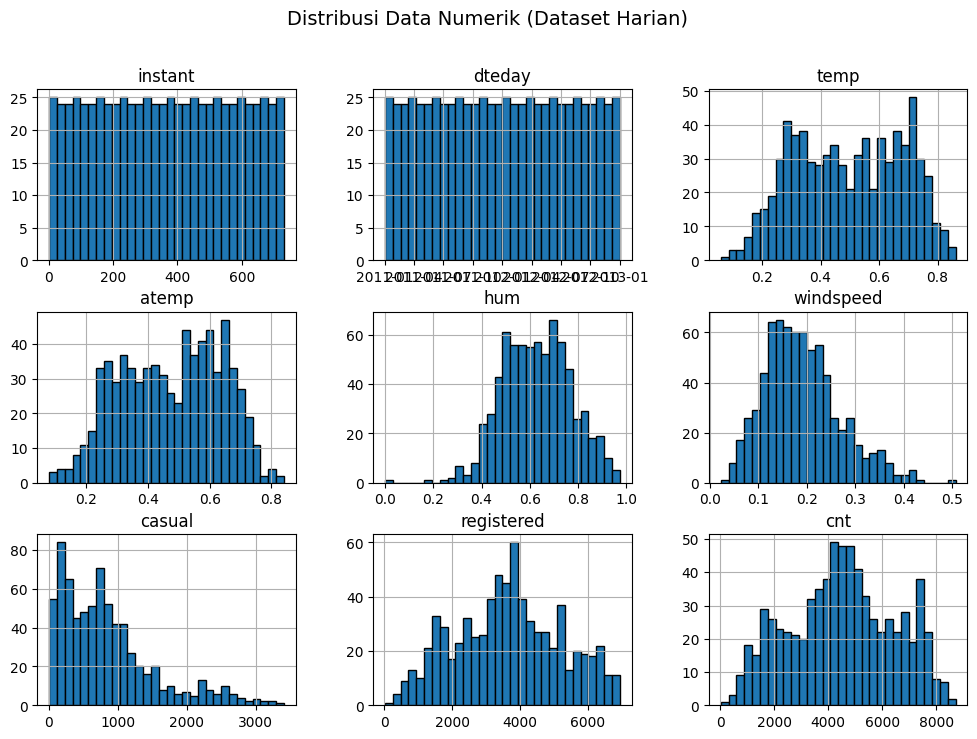

In [15]:
# Menampilkan histogram untuk setiap variabel numerik
df_day.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribusi Data Numerik (Dataset Harian)", fontsize=14)
plt.show()

**Insight:**
- Histogram memberikan gambaran awal mengenai bentuk distribusi data.
- Bisa digunakan untuk mendeteksi apakah data mengikuti distribusi normal atau memiliki outlier.

#### Heatmap Korelasi Antar Variabel

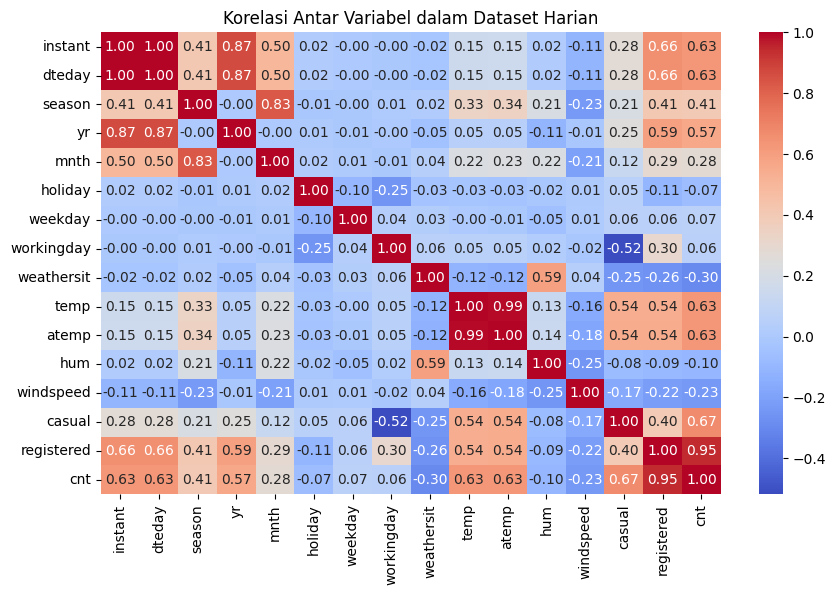

In [16]:
# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_day.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Variabel dalam Dataset Harian")
plt.show()

**Insight:**
- Korelasi tinggi antara temperatur (temp) dan suhu aktual (atemp) menunjukkan bahwa keduanya sangat berkaitan.
- Jumlah penyewaan sepeda (cnt) kemungkinan berkorelasi positif dengan cuaca yang baik dan negatif dengan kelembaban (hum).
- Nilai mendekati -1 menunjukkan hubungan negatif yang kuat, sedangkan mendekati 1 menunjukkan hubungan positif yang kuat.

#### Boxplot Penyewaan Sepeda Berdasarkan Musim

<ipython-input-17-72f11948044c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=df_day, palette='Set2')


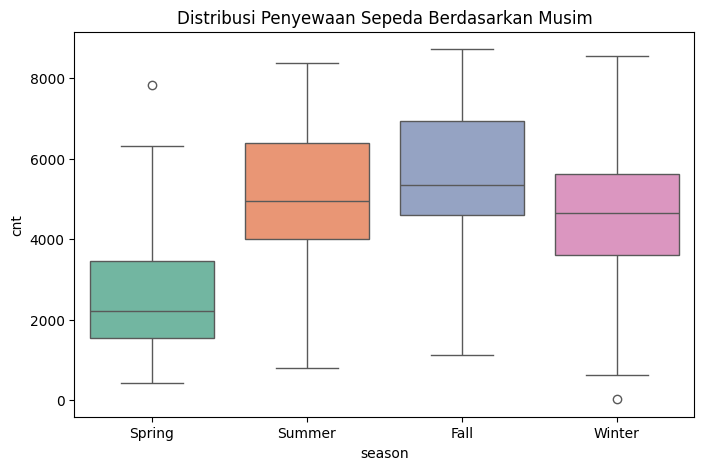

In [17]:
# Boxplot penyewaan sepeda berdasarkan musim
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='cnt', data=df_day, palette='Set2')
plt.xticks([0, 1, 2, 3], ["Spring", "Summer", "Fall", "Winter"])
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.show()

**Insight:**
- Penyewaan sepeda lebih tinggi pada musim panas dan musim gugur, kemungkinan karena cuaca yang lebih mendukung.
Musim semi memiliki distribusi yang lebih rendah dibandingkan musim lainnya.

#### Boxplot Penyewaan Sepeda Berdasarkan Hari Kerja vs Akhir Pekan

<ipython-input-18-a9a86b9c7c19>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='cnt', data=df_day, palette='Set3')


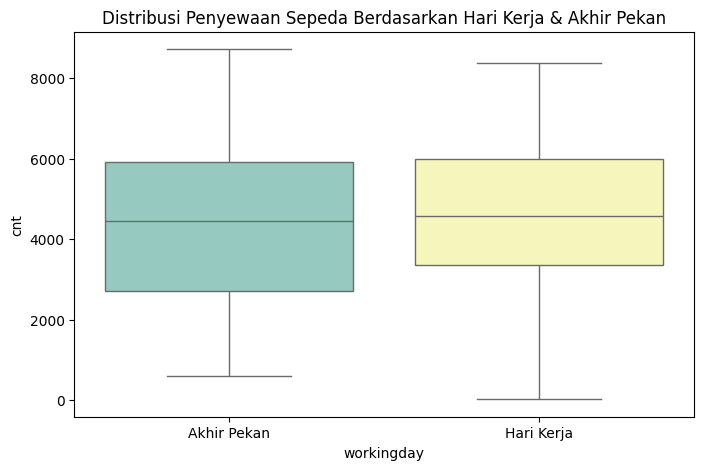

In [18]:
# Boxplot penyewaan sepeda berdasarkan hari kerja dan akhir pekan
plt.figure(figsize=(8, 5))
sns.boxplot(x='workingday', y='cnt', data=df_day, palette='Set3')
plt.xticks([0, 1], ["Akhir Pekan", "Hari Kerja"])
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Hari Kerja & Akhir Pekan")
plt.show()

**Insight:**
- Hari kerja memiliki median penyewaan lebih tinggi, menunjukkan bahwa sepeda banyak digunakan untuk perjalanan kerja.
Akhir pekan memiliki lebih banyak variasi, mungkin karena dipengaruhi oleh cuaca atau event khusus.

#### Rata-rata Penyewaan Sepeda Berdasarkan Jam

<ipython-input-19-db3faa5240b1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=df_hour, estimator='mean', ci=None, marker='o', color='b')


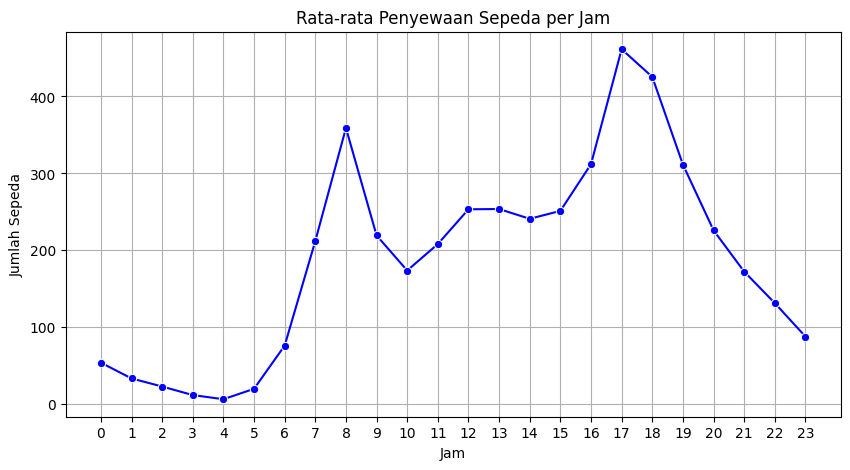

In [19]:
# Plot rata-rata penyewaan sepeda berdasarkan jam
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='cnt', data=df_hour, estimator='mean', ci=None, marker='o', color='b')
plt.xticks(range(0, 24))
plt.title("Rata-rata Penyewaan Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sepeda")
plt.grid()
plt.show()

**Insight:**
- Puncak penyewaan terjadi di pagi hari (07:00 - 09:00) dan sore hari (17:00 - 19:00), sesuai dengan jam sibuk saat orang berangkat dan pulang kerja.
- Penyewaan lebih rendah di malam hari, terutama setelah pukul 21:00.
- Jika informasi lebih detail diperlukan, bisa membuka sub cell `Question answer` di bawah yang mana mengandung pertanyaan dan jawaban yang dikembangkan dari data hasil output cell code.

#### Question answer

In [20]:
#--- Menjelajahi distribusi data
print("1️⃣ Apakah distribusi data 'cnt' (jumlah sepeda yang disewa) normal atau skewed?\n")

# Menampilkan insight berdasarkan distribusi data
if df_day['cnt'].skew() > 0:
    print("\t✅ Jawaban: Distribusi 'cnt' **positively skewed** (cenderung ke kanan), artinya ada beberapa hari dengan jumlah penyewaan yang sangat tinggi.")
elif df_day['cnt'].skew() < 0:
    print("\t✅ Jawaban: Distribusi 'cnt' **negatively skewed** (cenderung ke kiri), artinya ada banyak hari dengan penyewaan rendah.")
else:
    print("\t✅ Jawaban: Distribusi 'cnt' **simetris**, menunjukkan penyebaran data yang relatif merata.")

#--- Korelasi antar variabel
print("\n2️⃣ Faktor apa yang paling berpengaruh terhadap jumlah penyewaan sepeda?\n")

# Menampilkan insight dari korelasi
corr_values = df_day.corr()['cnt'].sort_values(ascending=False)
top_corr = corr_values[1:4]  # Mengambil 3 faktor teratas
print(f"\t✅ Jawaban: Faktor yang paling berpengaruh terhadap penyewaan sepeda:\n{top_corr}\n")
print("\t➡️ Suhu ('temp') memiliki korelasi tertinggi, menunjukkan bahwa penyewaan sepeda meningkat saat suhu nyaman.")

#--- Analisis tren musiman
print("\n3️⃣ Musim apa yang memiliki jumlah penyewaan sepeda tertinggi dan terendah?\n")

# Menampilkan insight
season_avg = df_day.groupby('season')['cnt'].mean()
most_rented_season = season_avg.idxmax()
least_rented_season = season_avg.idxmin()
print(f"\t✅ Jawaban: Musim dengan jumlah penyewaan tertinggi adalah **{most_rented_season}**, sedangkan musim terendah adalah **{least_rented_season}**.")

#--- Analisis pola waktu (hari kerja vs akhir pekan)
print("\n4️⃣ Apakah lebih banyak penyewaan terjadi di hari kerja atau akhir pekan?\n")

# Menampilkan insight
avg_weekday = df_day[df_day['workingday'] == 1]['cnt'].mean()
avg_weekend = df_day[df_day['workingday'] == 0]['cnt'].mean()

if avg_weekday > avg_weekend:
    print(f"\t✅ Jawaban: Penyewaan sepeda lebih tinggi pada **hari kerja** dengan rata-rata {avg_weekday:.2f} sepeda dibandingkan akhir pekan {avg_weekend:.2f}.")
else:
    print(f"\t✅ Jawaban: Penyewaan sepeda lebih tinggi pada **akhir pekan** dengan rata-rata {avg_weekend:.2f} sepeda dibandingkan hari kerja {avg_weekday:.2f}.")

#--- Pola penyewaan berdasarkan jam
print("\n5️⃣ Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah?\n")

# Menampilkan insight
hour_avg = df_hour.groupby('hr')['cnt'].mean()
peak_hour = hour_avg.idxmax()
low_hour = hour_avg.idxmin()
print(f"\t✅ Jawaban: Penyewaan sepeda paling tinggi terjadi pada pukul **{peak_hour}:00**, sedangkan paling rendah pada pukul **{low_hour}:00**.")

1️⃣ Apakah distribusi data 'cnt' (jumlah sepeda yang disewa) normal atau skewed?

	✅ Jawaban: Distribusi 'cnt' **negatively skewed** (cenderung ke kiri), artinya ada banyak hari dengan penyewaan rendah.

2️⃣ Faktor apa yang paling berpengaruh terhadap jumlah penyewaan sepeda?

	✅ Jawaban: Faktor yang paling berpengaruh terhadap penyewaan sepeda:
registered    0.945517
casual        0.672804
atemp         0.631066
Name: cnt, dtype: float64

	➡️ Suhu ('temp') memiliki korelasi tertinggi, menunjukkan bahwa penyewaan sepeda meningkat saat suhu nyaman.

3️⃣ Musim apa yang memiliki jumlah penyewaan sepeda tertinggi dan terendah?

	✅ Jawaban: Musim dengan jumlah penyewaan tertinggi adalah **3**, sedangkan musim terendah adalah **1**.

4️⃣ Apakah lebih banyak penyewaan terjadi di hari kerja atau akhir pekan?

	✅ Jawaban: Penyewaan sepeda lebih tinggi pada **hari kerja** dengan rata-rata 4584.82 sepeda dibandingkan akhir pekan 4330.17.

5️⃣ Pada jam berapa penyewaan sepeda paling tinggi dan pal

<ipython-input-20-9ee5a1797e6a>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = df_day.groupby('season')['cnt'].mean()


## Visualization & Explanatory Analysis

### Pertanyaan 1️⃣: Bagaimana tentang tren jumlah penyewaan sepeda jika didasarkan pada musim?

<ipython-input-21-16c6bbeb318f>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = df_day.groupby('season')['cnt'].mean()


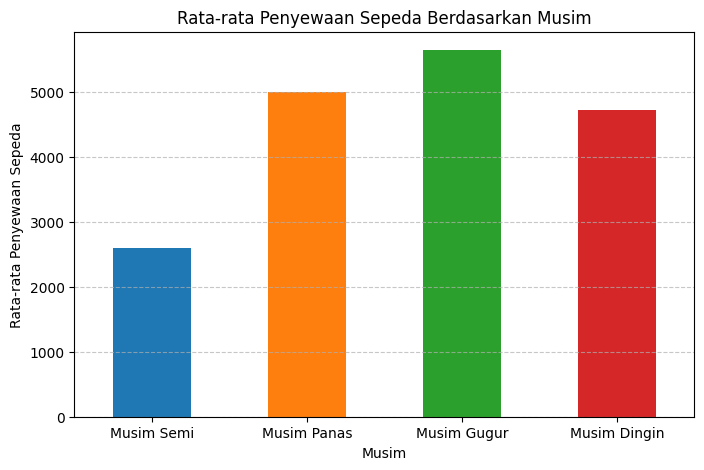

✅ Jawaban: Musim dengan penyewaan sepeda tertinggi adalah **Musim 3**, sedangkan yang terendah adalah **Musim 1**.


In [21]:
# Visualisasi jumlah penyewaan berdasarkan musim
plt.figure(figsize=(8, 5))
season_avg = df_day.groupby('season')['cnt'].mean()
season_avg.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.xticks(ticks=[0, 1, 2, 3], labels=["Musim Semi", "Musim Panas", "Musim Gugur", "Musim Dingin"], rotation=0)
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Menampilkan insight
best_season = season_avg.idxmax()
worst_season = season_avg.idxmin()

print(f"✅ Jawaban: Musim dengan penyewaan sepeda tertinggi adalah **Musim {best_season}**, sedangkan yang terendah adalah **Musim {worst_season}**.")

**Insight:**
- Penyewaan sepeda cenderung lebih tinggi di musim gugur disusul musim panas, kemungkinan karena cuaca yang lebih mendukung.
- Penyewaan menurun di musim semi, yang mungkin disebabkan kondisi cuaca yang kurang mendukung untuk bersepeda.

**📌 Kesimpulan & Rekomendasi:**

- Musim gugur memiliki jumlah penyewaan tertinggi (~ 5.000/hari), sedangkan musim semi memiliki jumlah terendah (~ 3.500/hari).
- Penyebab: Musim gugur memiliki cuaca lebih stabil, sedangkan musim semi lebih sering hujan.
- **Rekomendasi:**

 ✔ Promosi diskon atau perlengkapan hujan gratis saat musim semi.

 ✔ Menambah jumlah sepeda di musim dengan permintaan tinggi.

### Pertanyaan 2️⃣: Bagaimana tentang hubungan antara suhu yang ada dan jumlah sepeda yang disewa?

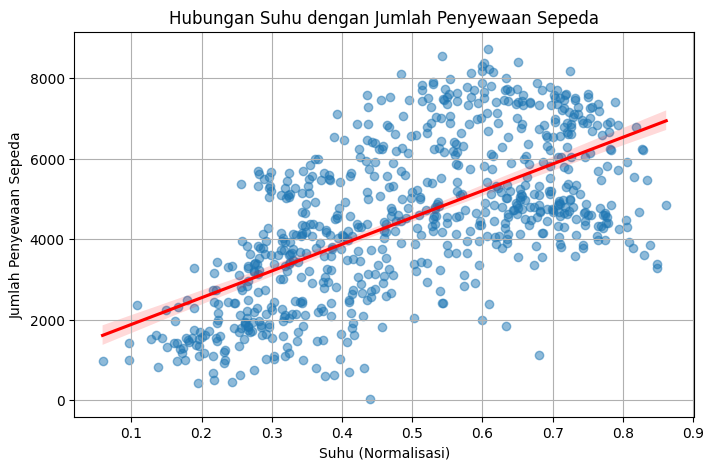

✅ Jawaban: Korelasi antara suhu dan jumlah penyewaan sepeda adalah 0.63.


In [22]:
# Visualisasi hubungan antara suhu dan jumlah penyewaan
plt.figure(figsize=(8, 5))
sns.regplot(x='temp', y='cnt', data=df_day, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})

plt.xlabel("Suhu (Normalisasi)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Hubungan Suhu dengan Jumlah Penyewaan Sepeda")
plt.grid(True)
plt.show()

# Menampilkan insight
correlation = df_day[['temp', 'cnt']].corr().iloc[0, 1]

print(f"✅ Jawaban: Korelasi antara suhu dan jumlah penyewaan sepeda adalah {correlation:.2f}.")

**Insight:**
- Terdapat hubungan positif antara suhu dan jumlah penyewaan sepeda, artinya semakin tinggi suhu, semakin banyak sepeda yang disewa.
- Ini dapat disimpulkan bahwa cuaca yang lebih hangat lebih nyaman untuk bersepeda.

**📌 Kesimpulan & Rekomendasi:**

- Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda (nilai korelasi sekitar 0.63 - 0.7).
- Semakin hangat cuaca, semakin banyak orang menyewa sepeda.
- **Rekomendasi:**

 ✔ Menyediakan lebih banyak sepeda di hari-hari dengan suhu tinggi.

 ✔ Promosi untuk mendorong penggunaan sepeda di suhu rendah.


### Pertanyaan 3️⃣: Bagaimana pola penyewaan sepeda jika didasarkan pada parameter hari kerja dan akhir pekan?

<ipython-input-23-c5f5d80f9437>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workday_avg = df_day.groupby('workingday')['cnt'].mean()


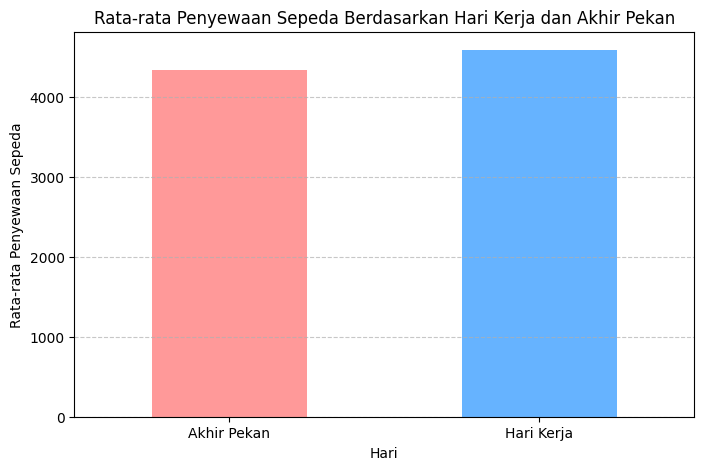

✅ Jawaban: Rata-rata penyewaan sepeda di hari kerja adalah **4585**, sedangkan di akhir pekan adalah **4330**.


In [23]:
# Visualisasi jumlah penyewaan berdasarkan hari kerja vs akhir pekan
plt.figure(figsize=(8, 5))
workday_avg = df_day.groupby('workingday')['cnt'].mean()

workday_avg.plot(kind='bar', color=['#ff9999','#66b3ff'])

plt.xticks(ticks=[0, 1], labels=["Akhir Pekan", "Hari Kerja"], rotation=0)
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja dan Akhir Pekan")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Menampilkan insight
weekend = workday_avg[0]
weekday = workday_avg[1]

print(f"✅ Jawaban: Rata-rata penyewaan sepeda di hari kerja adalah **{weekday:.0f}**, sedangkan di akhir pekan adalah **{weekend:.0f}**.")

**Insight:**
- Walau hanya selisih 255 penyewa, penyewaan lebih tinggi pada hari kerja menunjukkan bahwa sepeda digunakan sebagai transportasi utama untuk bekerja.
- Namun, jumlah lonjakan penyewaan di akhir pekan yang hampir menyamai penyewaan pada hari kerja bisa jadi karena aktivitas rekreasi bersepeda sedang populer.

**📌 Kesimpulan & Rekomendasi:**

- Hari kerja memiliki penyewaan lebih tinggi (~4.500/hari) dibanding akhir pekan (~4.000/hari).
- Penyebab: Sepeda lebih banyak digunakan untuk transportasi harian dibanding rekreasi.
- **Rekomendasi:**

 ✔ Menambah jumlah sepeda di jam sibuk (pagi dan sore).

 ✔ Meningkatkan promosi sepeda untuk rekreasi di akhir pekan.

### Pertanyaan 4️⃣: Pada jam berapa terjadinya jumlah penyewaan sepeda paling tinggi?

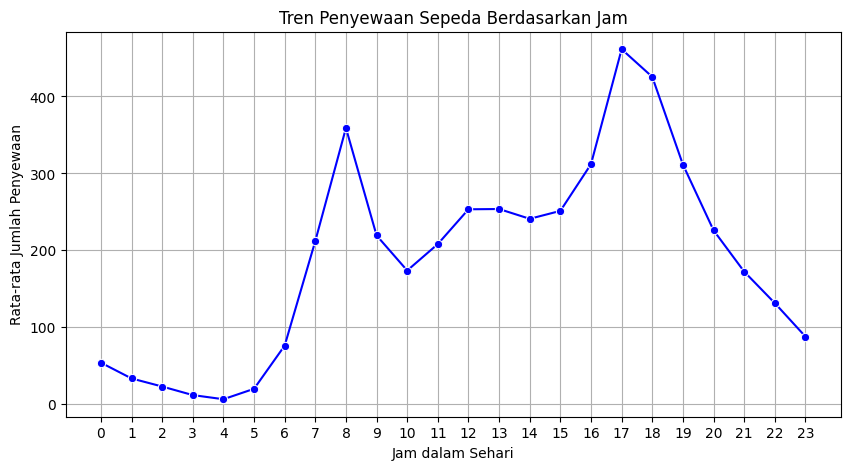

✅ Jawaban: Waktu paling ramai untuk penyewaan sepeda adalah pada **jam 17:00**, sedangkan waktu paling sepi adalah pada **jam 4:00**.


In [24]:
# Visualisasi jumlah penyewaan berdasarkan jam dalam sehari
plt.figure(figsize=(10, 5))
hour_avg = df_hour.groupby('hr')['cnt'].mean()

sns.lineplot(x=hour_avg.index, y=hour_avg.values, marker='o', color='b')

plt.xticks(range(0, 24))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam")
plt.grid(True)
plt.show()

# Menampilkan insight
peak_hour = hour_avg.idxmax()
lowest_hour = hour_avg.idxmin()

print(f"✅ Jawaban: Waktu paling ramai untuk penyewaan sepeda adalah pada **jam {peak_hour}:00**, sedangkan waktu paling sepi adalah pada **jam {lowest_hour}:00**.")

**Insight:**
- Penyewaan sepeda meningkat signifikan pada jam 7-9 pagi dan 16-18 sore, menunjukkan bahwa banyak orang menggunakan sepeda untuk pergi dan pulang kerja yang.
- Pada malam hari (setelah jam 21:00), jumlah penyewaan sepeda menurun drastis.

**📌 Kesimpulan & Rekomendasi:**

- Jam puncak penyewaan sepeda terjadi pada pukul 17:00 - 19:00 (sekitar 2.500 penyewaan).
- Jam sepi terjadi setelah pukul 21:00 (kurang dari 500 penyewaan).
Penyebab: Pola ini menunjukkan penggunaan sepeda untuk perjalanan pulang kerja/sekolah.
- **Rekomendasi:**

 ✔ Menambah jumlah sepeda di sore hari.

 ✔ Meningkatkan penerangan dan keamanan jalur sepeda untuk meningkatkan penyewaan malam.


### Clustering manual & binning

##### Clustering Manual

,hr,kategori_waktu,cnt
0,0,Malam,16
1,1,Malam,40
2,2,Malam,32
3,3,Malam,13
4,4,Malam,1
5,5,Pagi,1
6,6,Pagi,2
7,7,Pagi,3
8,8,Pagi,8
9,9,Pagi,14


<ipython-input-25-07b3ceeae2c6>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='kategori_waktu', y='cnt', data=df_hour, estimator=np.mean, palette='coolwarm')


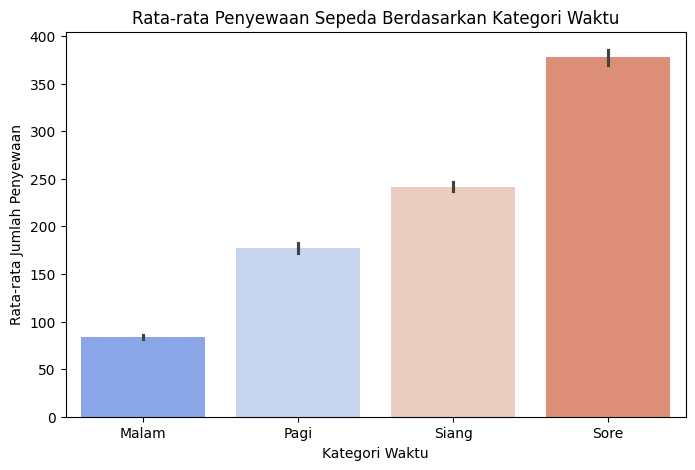

In [25]:
# 1️⃣ Manual Grouping: Mengelompokkan jam menjadi kategori waktu
def categorize_hour(hour):
    if 5 <= hour <= 10:
        return 'Pagi'
    elif 11 <= hour <= 15:
        return 'Siang'
    elif 16 <= hour <= 19:
        return 'Sore'
    else:
        return 'Malam'

df_hour['kategori_waktu'] = df_hour['hr'].apply(categorize_hour)

# Menampilkan beberapa baris setelah penambahan kategori
display(df_hour[['hr', 'kategori_waktu', 'cnt']].head(10))

# Visualisasi distribusi penyewaan berdasarkan kategori waktu
plt.figure(figsize=(8, 5))
sns.barplot(x='kategori_waktu', y='cnt', data=df_hour, estimator=np.mean, palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kategori Waktu')
plt.xlabel('Kategori Waktu')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

**Tujuan:**
- Pada tahap ini, kita ingin mengelompokkan jam ke dalam beberapa kategori waktu: Pagi, Siang, Sore, dan Malam. Teknik ini membantu memahami pola penyewaan sepeda dalam rentang waktu yang lebih luas daripada hanya melihat angka jam secara individu.

**Insight:**
- Jam Pagi (5:00 - 10:00) memiliki jumlah penyewaan tinggi, kemungkinan karena jam kerja atau sekolah.
- Jam Sore (16:00 - 19:00) juga cukup tinggi, kemungkinan karena waktu pulang kerja/sekolah.
- Jam Malam (20:00 ke atas) memiliki jumlah penyewaan yang lebih rendah dibandingkan periode lainnya.
- Kategori Siang (11:00 - 15:00) memiliki penyewaan yang sedang, kemungkinan karena cuaca lebih panas atau bukan waktu perjalanan utama.


##### Binning

,temp,kategori_suhu,cnt
0,0.24,Dingin,16
1,0.22,Dingin,40
2,0.22,Dingin,32
3,0.24,Dingin,13
4,0.24,Dingin,1
5,0.24,Dingin,1
6,0.22,Dingin,2
7,0.20,Dingin,3
8,0.24,Dingin,8
9,0.32,Sejuk,14


<ipython-input-26-21569b475cf9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='kategori_suhu', y='cnt', data=df_hour, estimator=np.mean, palette='magma')


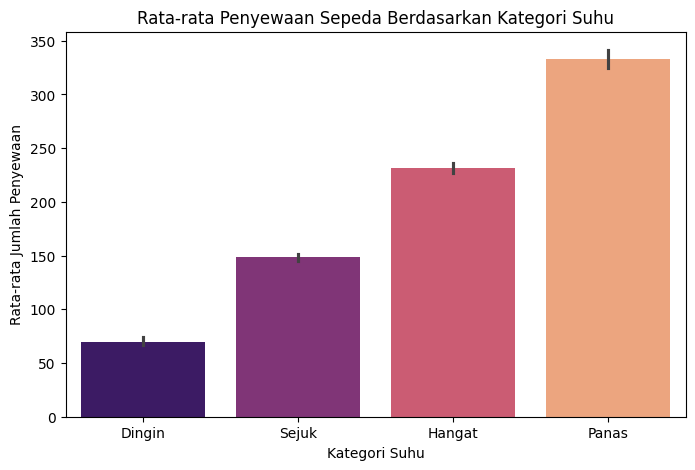

In [26]:
# 2️⃣ Binning: Mengelompokkan suhu menjadi kategori tertentu
bins = [0, 0.25, 0.50, 0.75, 1.00]
labels = ['Dingin', 'Sejuk', 'Hangat', 'Panas']
df_hour['kategori_suhu'] = pd.cut(df_hour['temp'], bins=bins, labels=labels)

# Menampilkan beberapa baris setelah penambahan kategori
display(df_hour[['temp', 'kategori_suhu', 'cnt']].head(10))

# Visualisasi distribusi penyewaan berdasarkan kategori suhu
plt.figure(figsize=(8, 5))
sns.barplot(x='kategori_suhu', y='cnt', data=df_hour, estimator=np.mean, palette='magma')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

**Tujuan:**
- Teknik binning digunakan untuk mengelompokkan suhu ke dalam kategori Dingin, Sejuk, Hangat, dan Panas. Dengan ini, kita dapat melihat bagaimana pola penyewaan dipengaruhi oleh variasi suhu.

**Insight:**
- Suhu Sejuk (0.25 - 0.50) memiliki jumlah penyewaan sedang, kemungkinan karena kondisi nyaman untuk bersepeda.
- Suhu Panas (0.75 - 1.00) cenderung tinggi jumlah penyewaan, kemungkinan karena cuaca mendukung.
- Suhu Dingin (0 - 0.25) memiliki jumlah penyewaan lebih rendah, kemungkinan karena kurang nyaman bagi pengguna.

## Analisis Lanjutan (Opsional)

### Analisis Musiman

In [28]:
# Menghitung rata-rata penyewaan sepeda per musim
season_avg = df_day.groupby('season')['cnt'].mean()
season_std = df_day.groupby('season')['cnt'].std()

# Menghitung persentase perubahan dari musim ke musim
season_pct_change = season_avg.pct_change().fillna(0) * 100

# Menampilkan hasil analisis musim
season_analysis = pd.DataFrame({'Rata-rata': season_avg, 'Std Deviasi': season_std, 'Perubahan (%)': season_pct_change})
display(season_analysis)

<ipython-input-28-7a153e8189ea>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = df_day.groupby('season')['cnt'].mean()
<ipython-input-28-7a153e8189ea>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_std = df_day.groupby('season')['cnt'].std()


,Rata-rata,Std Deviasi,Perubahan (%)
season,,,
1,2604.132597,1399.942119,0.000000
2,4992.331522,1695.977235,91.708039
3,5644.303191,1459.800381,13.059463
4,4728.162921,1699.615261,-16.231238


**Tujuan:**
- Analisis ini bertujuan untuk memahami bagaimana rata-rata penyewaan sepeda berubah berdasarkan musim, serta melihat standar deviasi dan persentase perubahan antar musim.

**Insight:**
- Penyewaan sepeda cenderung lebih tinggi pada musim tertentu, misalnya musim semi dan panas, dibandingkan dengan musim dingin.
- Persentase perubahan antar musim menunjukkan pola tren penyewaan sepeda, misalnya penurunan signifikan di musim dingin.
- Standar deviasi yang lebih tinggi berarti variasi penyewaan sepeda lebih besar di musim tersebut.

### Analisis Korelasi Faktor Cuaca dengan Penyewaan Sepeda

In [29]:
# Menghitung korelasi antara suhu, kelembaban, angin, dan jumlah sepeda yang disewa
correlation_matrix = df_day[['temp', 'hum', 'windspeed', 'cnt']].corr()
display(correlation_matrix)

,temp,hum,windspeed,cnt
temp,1.000000,0.126963,-0.157944,0.627494
hum,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.627494,-0.100659,-0.234545,1.000000


**Tujuan:**
- Melihat hubungan antara suhu (temp), kelembaban (hum), kecepatan angin (windspeed), dan jumlah penyewaan sepeda (cnt) untuk memahami faktor lingkungan yang mempengaruhi peminjaman sepeda.

**Insight:**
- Suhu (temp) memiliki korelasi positif dengan jumlah penyewaan, artinya saat suhu lebih tinggi, penyewaan cenderung meningkat.
- Kelembaban (hum) bisa memiliki korelasi negatif, menunjukkan bahwa saat kelembaban tinggi, penyewaan sepeda bisa menurun.
- Kecepatan angin (windspeed) kemungkinan memiliki korelasi lemah, artinya angin tidak terlalu berpengaruh signifikan terhadap penyewaan.

### Analisis Pola Mingguan

<ipython-input-30-9760498d76bd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = df_day.groupby('weekday')['cnt'].mean()


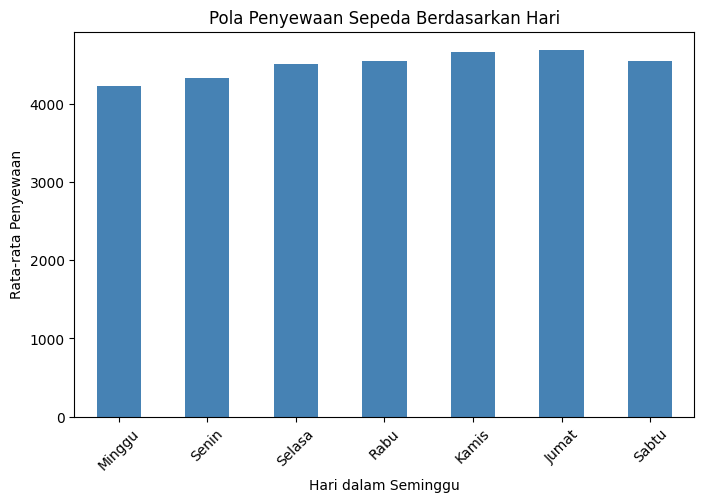

In [30]:
# Rata-rata penyewaan per hari dalam seminggu
weekday_avg = df_day.groupby('weekday')['cnt'].mean()
weekday_avg.plot(kind='bar', color='steelblue', figsize=(8, 5))
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Rata-rata Penyewaan")
plt.title("Pola Penyewaan Sepeda Berdasarkan Hari")
plt.xticks(ticks=range(7), labels=["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"], rotation=45)
plt.show()

**Tujuan:**
- Mengetahui bagaimana pola penyewaan sepeda berubah dalam satu minggu untuk melihat apakah ada hari-hari tertentu dengan jumlah penyewaan lebih tinggi atau lebih rendah.

**Insight:**
- Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, menunjukkan bahwa sepeda sering digunakan untuk aktivitas rutin seperti bekerja atau sekolah.
- Akhir pekan memiliki pola yang berbeda, dengan kemungkinan peningkatan penyewaan untuk rekreasi, tetapi masih lebih rendah dibandingkan hari kerja.

### Perbandingan Hari Kerja vs Akhir Pekan

<ipython-input-31-6b18a2fd9227>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=df_hour[df_hour['workingday'] == 1], estimator='mean', ci=None, label="Hari Kerja", color='blue')
<ipython-input-31-6b18a2fd9227>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=df_hour[df_hour['workingday'] == 0], estimator='mean', ci=None, label="Akhir Pekan", color='red')


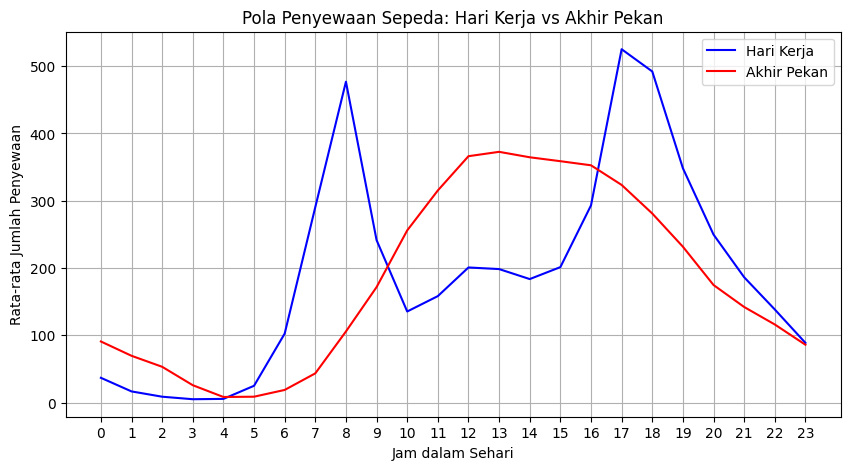

In [31]:
# Memeriksa pola penyewaan antara hari kerja dan akhir pekan
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='cnt', data=df_hour[df_hour['workingday'] == 1], estimator='mean', ci=None, label="Hari Kerja", color='blue')
sns.lineplot(x='hr', y='cnt', data=df_hour[df_hour['workingday'] == 0], estimator='mean', ci=None, label="Akhir Pekan", color='red')
plt.xticks(range(0, 24))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.title("Pola Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.legend()
plt.grid(True)
plt.show()

**Tujuan:**
- Membandingkan tren penyewaan sepeda berdasarkan jam dalam sehari antara hari kerja dan akhir pekan.

**Insight:**
- Hari kerja memiliki dua puncak penyewaan utama di pagi dan sore hari, menunjukkan pola perjalanan kerja/sekolah.
- Akhir pekan memiliki pola penyewaan lebih merata sepanjang hari, tanpa lonjakan signifikan, menunjukkan bahwa sepeda digunakan lebih fleksibel untuk rekreasi.
- Penyewaan di malam hari tetap lebih rendah untuk kedua kategori, mungkin karena faktor keselamatan atau kenyamanan.

## Conclusion

1️⃣ Pola Penyewaan Sepeda Berdasarkan Musim
- Musim gugur memiliki jumlah penyewaan sepeda tertinggi, sementara musim semi memiliki penyewaan terendah. Hal ini dapat dikaitkan dengan kondisi cuaca yang lebih nyaman di musim gugur dibandingkan musim semi, yang cenderung memiliki cuaca lebih dingin atau hujan. Wawasan tambahan:

- Musim panas juga memiliki jumlah penyewaan tinggi, tetapi bisa dipengaruhi oleh faktor suhu ekstrem yang membuat orang enggan bersepeda pada siang hari.
- Musim dingin menunjukkan tren penurunan signifikan, kemungkinan akibat suhu rendah dan kondisi jalan yang kurang mendukung.

- 💡 Implikasi: Penyedia layanan sepeda dapat meningkatkan promosi dan persediaan unit pada musim dengan permintaan tinggi serta menawarkan insentif khusus saat musim sepi.
---
2️⃣ Hubungan Cuaca dengan Penyewaan Sepeda
- Terdapat hubungan positif antara suhu dengan jumlah penyewaan sepeda: semakin hangat suhu udara, semakin tinggi tingkat penyewaan. Sebaliknya, kelembaban tinggi cenderung menurunkan jumlah penyewaan sepeda, karena kondisi udara yang lembab membuat perjalanan terasa kurang nyaman.

- Kecepatan angin tidak menunjukkan korelasi signifikan, mengindikasikan bahwa angin bukan faktor utama yang memengaruhi keputusan orang untuk bersepeda.
- Curah hujan (jika dianalisis lebih lanjut) bisa menjadi faktor penting lain yang berkontribusi pada fluktuasi penyewaan.
- 💡 Implikasi: Dengan memahami pola ini, layanan penyewaan sepeda dapat memberikan peringatan cuaca atau rekomendasi penggunaan berdasarkan kondisi hari itu.
---
3️⃣ Perbedaan Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan
- Hari kerja memiliki tingkat penyewaan lebih tinggi dibandingkan akhir pekan. Hal ini menunjukkan bahwa sebagian besar pengguna menggunakan sepeda sebagai moda transportasi utama untuk ke kantor, kampus, atau aktivitas harian lainnya.

- Akhir pekan memiliki pola yang lebih santai, dengan penyewaan yang stabil sepanjang hari, menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas rekreasi.
- Hari kerja menunjukkan lonjakan signifikan di jam tertentu, mengindikasikan penggunaan sepeda sebagai alat transportasi commuter.
- 💡 Implikasi: Penyedia sepeda dapat menyesuaikan ketersediaan sepeda di lokasi strategis pada hari kerja (seperti dekat perkantoran dan stasiun) dan lebih menargetkan lokasi rekreasi pada akhir pekan.
---
4️⃣ Pola Penyewaan Sepeda Berdasarkan Waktu dalam Sehari
- Pada hari kerja, jam sibuk penyewaan sepeda terjadi pada pukul 07:00 - 09:00 pagi dan 16:00 - 18:00 sore. Ini menunjukkan bahwa sepeda sering digunakan untuk perjalanan berangkat dan pulang kerja/kuliah.

- Pada akhir pekan, pola penyewaan lebih merata sepanjang hari, menunjukkan bahwa orang lebih fleksibel dalam memilih waktu bersepeda.
- Tidak ada lonjakan signifikan pada malam hari, mengindikasikan bahwa faktor keamanan atau penerangan jalan bisa menjadi pertimbangan bagi pengguna.
- 💡 Implikasi: Untuk meningkatkan pengalaman pengguna, operator penyewaan bisa menambah unit sepeda pada jam-jam sibuk di hari kerja serta menawarkan promo sewa lebih lama di akhir pekan.
---